
Converged
No. of iterations:  59172
Minimum value of cost function:  0.005647955538903715


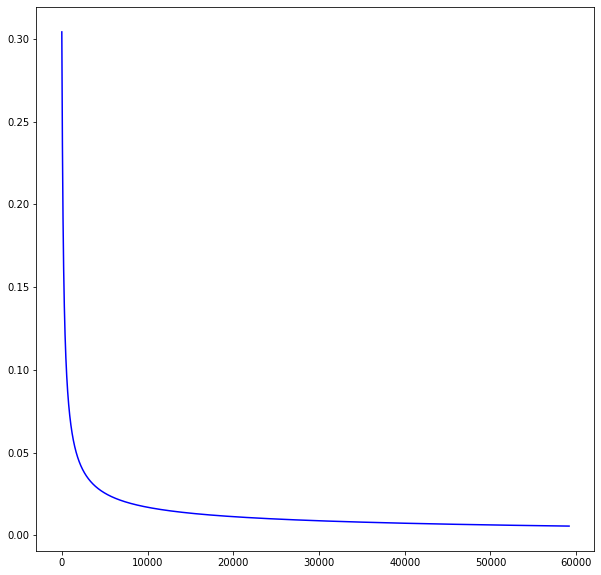

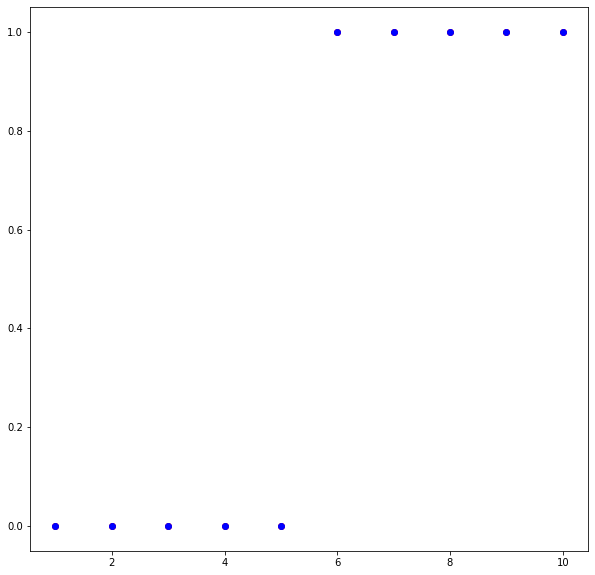

Predicted y== [0 0 0 0 0 1 1 1 1 1]
r2score for training set= 1.0

Converged
No. of iterations:  2481
Minimum value of cost function:  0.00047279729857813954


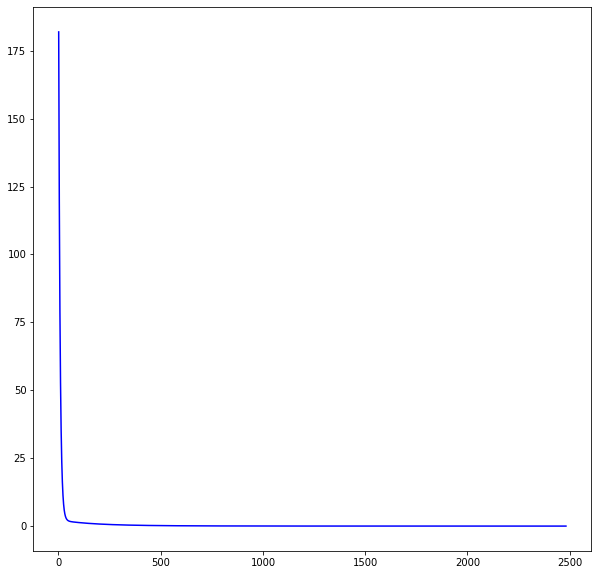

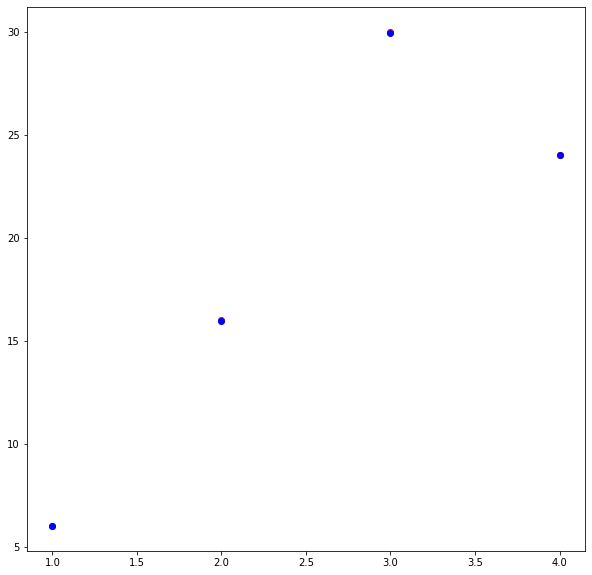

Predicted y== [ 6.01788994 15.97668543 29.96940043 24.04452444]
r2score for training set= 0.9999883259926277
theta_from_grad:  [6.01788994 5.92487599 4.0339195 ]
r2 score for test set linear regression:  0.9377918467606721


In [17]:
#Logistic Regression and Linear Regression from formulae with regularization included(L2 regularization/Ridge regression)
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def hypothesis(xi, thetaParam, category):
  if(category=='linear'):
    hypo=np.dot(thetaParam,xi)
  else:
    e_power=np.dot(thetaParam, xi)
    hypo=1/(1+np.exp(-e_power))
  return hypo

def differenceTerm(value1, y):
  return value1-y

def predict(thetaParam,x, category):
  ans=[]
  for i in range(0, len(x)):
    hypo=hypothesis(x[i], thetaParam, category)
    if(category=='logistic'):
        if(hypo>=0.5):
          hypo=1
        else:
          hypo=0
    ans.append(hypo)
  ans=np.asarray(ans)
  return ans

def plot_graph(plot_on_x, plot_on_y, typeOfGraph, col):
  from matplotlib.pyplot import figure
  figure(figsize=(10, 10))
  if(typeOfGraph=='line'):
    plt.plot(plot_on_x, plot_on_y, color=col)
    scale_factor = 1

    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    plt.xlim(xmin * scale_factor, xmax * scale_factor)
    plt.ylim(ymin * scale_factor, ymax * scale_factor)
    plt.show()
  else:
    plt.scatter(plot_on_x[0], plot_on_y[0], color=col[0])
    plt.scatter(plot_on_x[1], plot_on_y[1], color=col[1])
    plt.show()

def feature_scaling(on_this_array):
  if(len(on_this_array.shape)==2):
    on_this_array=on_this_array.astype(np.double)  
    for i in range(0, len(on_this_array[0])):
      meanValue=np.mean(on_this_array[:, i])
      stdValue=np.std(on_this_array[:, i])
      on_this_array[:,i]=(on_this_array[:,i]-meanValue)/stdValue
  else:
    on_this_array=on_this_array.astype(np.double)
    y_meanValue=np.mean(on_this_array)
    y_stdValue=np.std(on_this_array)
    on_this_array=(on_this_array[:]-y_meanValue)/y_stdValue
  return on_this_array

def gradientDescent(x,y, category):
  sum1=0
  sum_cost=0
  temp=[]
  theta=np.random.rand(len(x[0]))
  theta=np.asarray(theta)
  theta_additions=np.zeros([len(theta)-1])
  flag=0
  count=0
  m=len(x)
  alpha=0.01
  costFunction=[]
  count=0
  lambdaReg=0
  sum_cost_regularization=0
  while(True):
    flag=0
    for i in range(0, len(x)):
      hyp=hypothesis(x[i], theta, category) 
      sum1=sum1+differenceTerm(hyp, y[i])
      if(category=='linear'):
        sum_cost=sum_cost+differenceTerm(hyp, y[i])*differenceTerm(hyp, y[i])
      else:
        sum_cost=sum_cost-y[i]*np.log(hyp)-(1-y[i])*np.log((1-hyp))
      for k in range(0, len(theta_additions)):
        theta_additions[k]=theta_additions[k]+differenceTerm(hyp, y[i])*x[i][k+1]
    sum_cost_regularization=0
    for index in range(0, len(theta)):
      sum_cost_regularization=sum_cost_regularization+theta[index]*theta[index]

    costFunction.append((sum_cost + lambdaReg*sum_cost_regularization)/(2*m))
    #print("Cost function now: ", costFunction[len(costFunction)-1])
    if((costFunction[len(costFunction)-2]-costFunction[len(costFunction)-1])<0):
      alpha=alpha/10
      print("Updating alpha to: ", alpha)

    temp.append(theta[0]-(alpha*sum1)/m)
    regularization_term=1-((alpha*lambdaReg)/m)
    for k in range(0, len(theta_additions)):
      temp.append(theta[k+1]*regularization_term-(alpha*theta_additions[k])/m)

    temp=np.asarray(temp)
    change=np.abs(np.subtract(theta, temp))
    flag=0
    for item in change:
      if(item>=1e-04):
        flag=1
        break
    if(flag==0):
      print("\nConverged")
      break
    for i in range(0, len(temp)):
      theta[i]=temp[i]
    theta_additions=np.zeros([len(theta)-1])
    #print("\nTheta now==", theta)
    temp=[]
    count=count+1
    sum1=sum2=sum3=sum_cost=0
  print("No. of iterations: ", count)
  print("Minimum value of cost function: " , np.min(costFunction))
  plot_graph(range(1,len(costFunction)+1), costFunction, 'line', 'blue')
  plot_graph(np.asarray([range(1,len(y)+1), range(1, len(y)+1)]), np.asarray([y, predict(theta,x, category)]), 'scatter', np.asarray(['red', 'blue']))  
  print("Predicted y==", predict(theta,x, category))
  from sklearn.metrics import r2_score
  r2score=r2_score(y, predict(theta,x, category))
  print("r2score for training set=", r2score)
  return theta

#LOGISTIC REGRESSION
#<------------------------------------>
x=[
   [1, 2.7810836,	2.550537003 ],
   [1,1.465489372,	2.362125076 ],
   [1, 3.396561688,	4.400293529],
   [1, 1.38807019,	1.850220317],
   [1,3.06407232,	3.005305973],
   [1, 7.627531214,	2.759262235],
   [1, 5.332441248,	2.088626775],
   [1, 6.922596716,	1.77106367],
   [1,8.675418651,	-0.2420686549],
   [1, 7.673756466,	3.508563011 ]
   ]
y=[0,0,0,0,0,1,1,1,1,1]
x=np.asarray(x)
y=np.asarray(y)

from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
x=obj.fit_transform(x)

theta_from_gd=gradientDescent(x,y,'logistic')
#<------------------------------------>

#LINEAR REGRESSION
#<------------------------------------>
x=[[1,0,0], [1,1,1], [1,2,3],[1,1,3] ]
y=[6,16,30,24]
x=np.asarray(x)
y=np.asarray(y)

theta_from_gd=gradientDescent(x, y, 'linear')
print("theta_from_grad: ", theta_from_gd)
from sklearn.metrics import r2_score
r2score_hell=r2_score([16,36,40,72], predict(theta_from_gd, [[1,1,1], [1,1,6], [1,1,7], [1,4,8]], 'linear'))
print("r2 score for test set linear regression: ", r2score_hell)